In [28]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading the file and storing in a dataframe
bike_df = pd.read_csv('data/hour_sm.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [3]:
#cleaning the data
#removing few columns
bike_df_mod = bike_df.drop(['instant','yr','casual','registered'], axis = 1)
bike_df_mod.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1/1/2011,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1/1/2011,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1/1/2011,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1/1/2011,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1/1/2011,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
bike_df_mod.count()

dteday        17379
season        17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

In [5]:

#temp was normalized by dividing by 41 in original dataset.we are multiplying by 41 to get the real values in C
temp_c=bike_df_mod['temp']*41

#converting to F
temp_f = round((temp_c *9/5) + 32,2)

#writting the temp_f values to the temp_f column
bike_df_mod['temp_f'] = temp_f


#temp was normalized by dividing by 50 in original dataset.we are multiplying by 50 to get the real values in C
atemp_c=bike_df_mod['atemp']*50

#converting to F
atemp_f = round((atemp_c *9/5) + 32,2)

#writting the temp_f values to the temp_f column
bike_df_mod['atemp_f'] = atemp_f


#humidity was normalized by dividing by 100 in original dataset
#we are multiplying by 100 and wriiting it to the column hum1
bike_df_mod['hum1']=bike_df_mod['hum']*100

#windspeed was normalized by dividing by 67 in original dataset.
#we are multiplying by 67 and wriiting it to the column windspeed1
bike_df_mod['winspeed1']=round(bike_df_mod['windspeed']*67,2)

#dropping the original columns temp,atemp, hum, windspeed
bike_data = bike_df_mod.drop(['temp','atemp','hum','windspeed'],axis = 1)
bike_data.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt,temp_f,atemp_f,hum1,winspeed1
0,1/1/2011,1,1,0,0,6,0,1,16,49.71,57.91,81.0,0.0
1,1/1/2011,1,1,1,0,6,0,1,40,48.24,56.54,80.0,0.0
2,1/1/2011,1,1,2,0,6,0,1,32,48.24,56.54,80.0,0.0
3,1/1/2011,1,1,3,0,6,0,1,13,49.71,57.91,75.0,0.0
4,1/1/2011,1,1,4,0,6,0,1,1,49.71,57.91,75.0,0.0


(array([ 4., 19., 35., 44., 43., 32., 51., 71., 82., 85., 58., 39., 43.,
        45., 52., 22.,  6.]),
 array([  22.        ,  533.29411765, 1044.58823529, 1555.88235294,
        2067.17647059, 2578.47058824, 3089.76470588, 3601.05882353,
        4112.35294118, 4623.64705882, 5134.94117647, 5646.23529412,
        6157.52941176, 6668.82352941, 7180.11764706, 7691.41176471,
        8202.70588235, 8714.        ]),
 <a list of 17 Patch objects>)

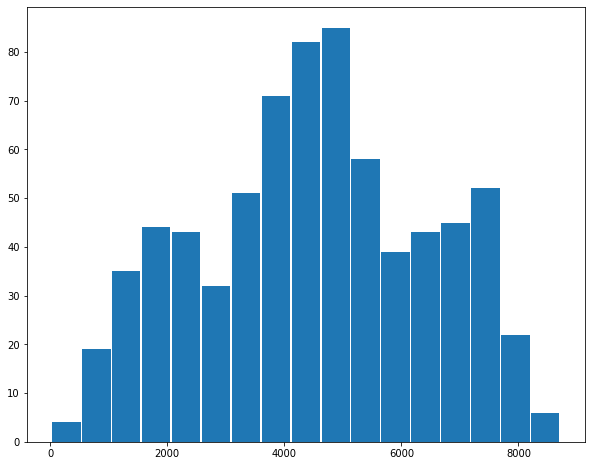

In [41]:
plt.subplots(figsize = (10,8))
count_per_day = bike_data.groupby('dteday')['cnt'].sum()
count_per_day = pd.DataFrame(count_per_day)
plt.hist(count_per_day['cnt'],bins = 17,rwidth=0.95)